In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliners_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels.stats.outliners_influence'

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

In [16]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.shape

(213, 11)

In [5]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [18]:
from collections import Counter
Counter(df['1.1'])

Counter({1: 69, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29})

In [19]:
X=df.drop("1.1",axis=1)
y=df['1.1']

In [20]:
import seaborn as sns

In [21]:
df.corr()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
1,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,0.451437,-0.078151,0.878113
1.52101,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
13.64,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
4.49,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
1.10,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
71.78,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
0.06,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
8.75,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
0.00,0.451437,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
0.00.1,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090


In [23]:
df.corr()['1.1'].sort_values()

4.49      -0.744004
0.00.1    -0.191090
1.52101   -0.161322
0.06      -0.012765
8.75       0.000372
71.78      0.147767
13.64      0.504983
0.00       0.574896
1.10       0.597754
1          0.878113
1.1        1.000000
Name: 1.1, dtype: float64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

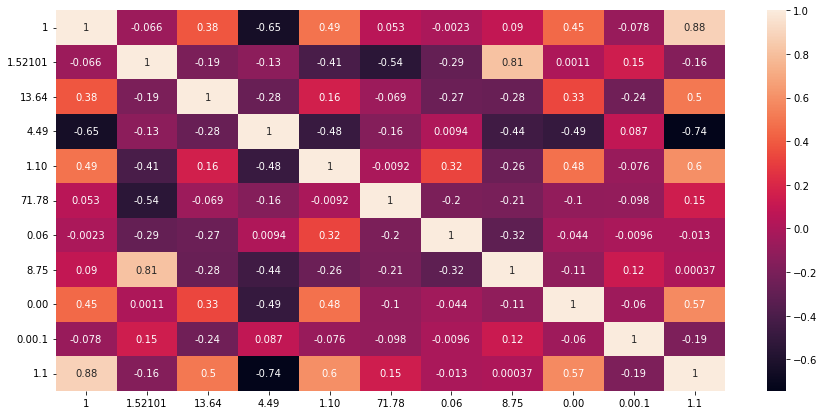

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [27]:
df_features=df.drop('1.1',axis=1)

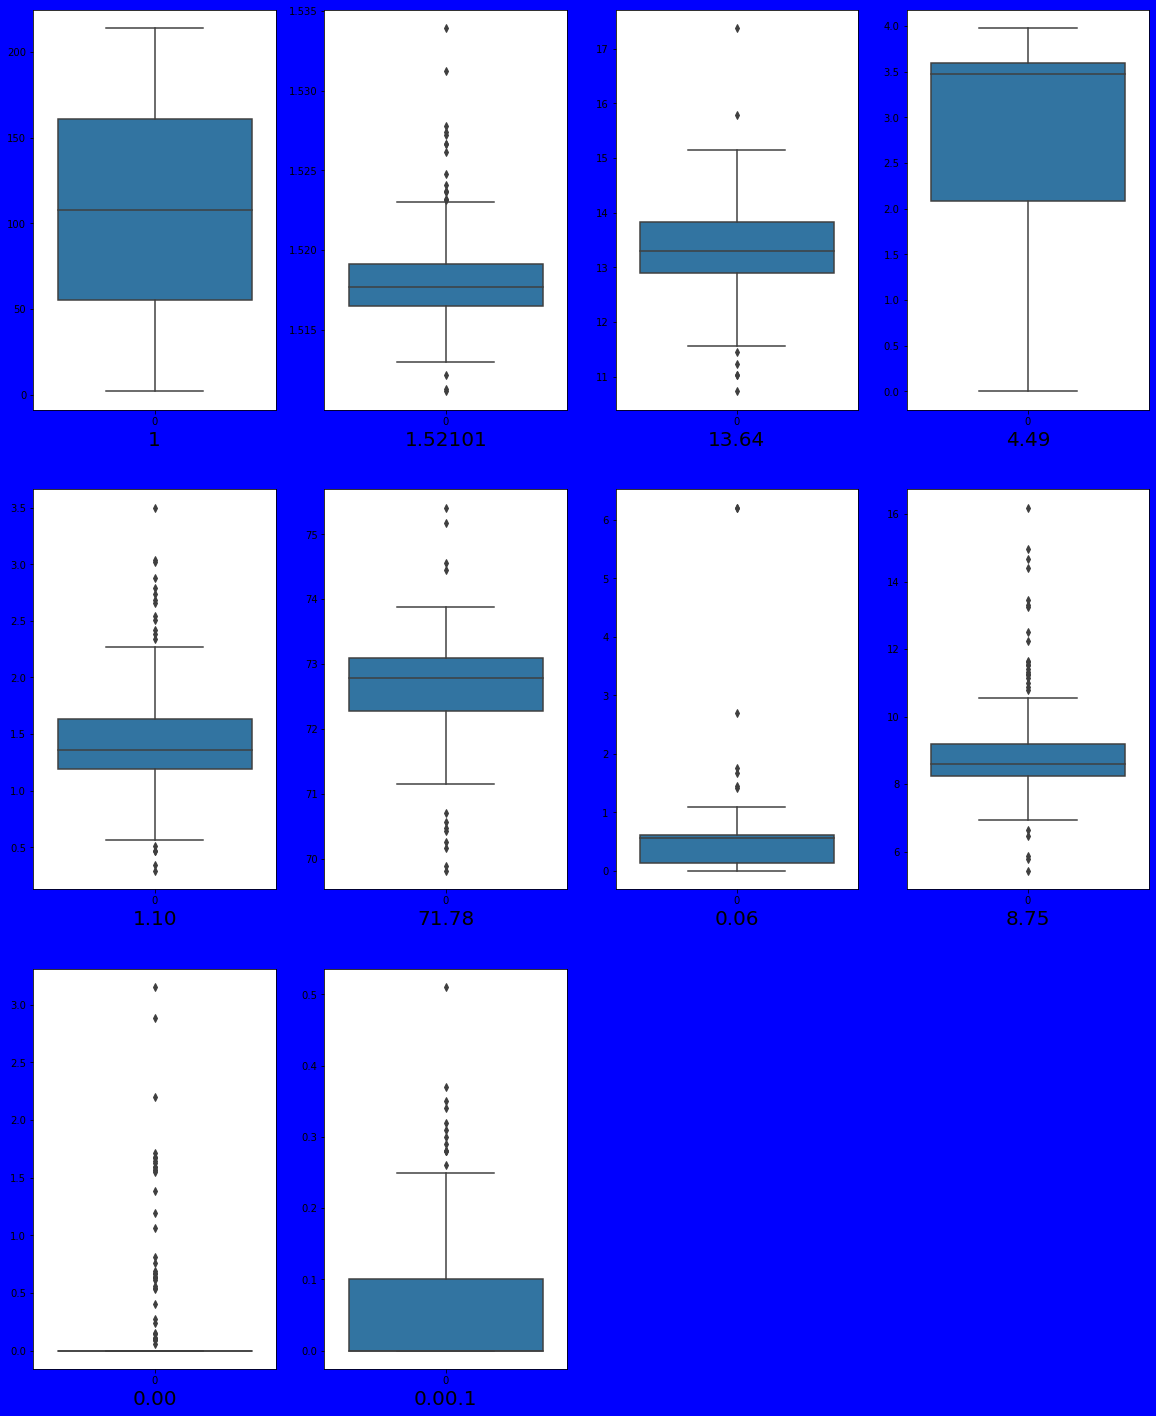

In [28]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1

for column in df_features:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [29]:
df.skew()

1          0.000000
1.52101    1.639658
13.64      0.457318
4.49      -1.154323
1.10       0.900017
71.78     -0.744546
0.06       6.549276
8.75       2.040591
0.00       3.406749
0.00.1     1.747173
1.1        1.108861
dtype: float64

In [30]:
df.corr()['1.1']

1          0.878113
1.52101   -0.161322
13.64      0.504983
4.49      -0.744004
1.10       0.597754
71.78      0.147767
0.06      -0.012765
8.75       0.000372
0.00       0.574896
0.00.1    -0.191090
1.1        1.000000
Name: 1.1, dtype: float64

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(213, 11)

In [32]:
threshold=3
print (np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [33]:
import numpy as np
len(np.where(z>3)[0])

33

In [35]:
z.iloc[4]

1          1.658884
1.52101    0.789399
13.64      0.755419
4.49       0.649895
1.10       0.347848
71.78      0.407878
0.06       0.216258
8.75       0.623951
0.00       0.353808
0.00.1     2.082200
1.1        0.851703
Name: 4, dtype: float64

In [36]:
df.shape

(213, 11)

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new.shape

(193, 11)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [42]:
X=df.drop(columns=['1.1'])
y=df['1.1']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [50]:
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(X_test)
        
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            
        print(classification_report(y_test,pred,digits=2))

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
metric_score(clf,X_train,X_test,y_train,y_test,train=True)
metric_score(clf,X_train,X_test,y_train,y_test,train=False)

Accuracy score:100.00%
Accuracy score:96.30%
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.94      0.94      0.94        18
           3       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         7

    accuracy                           0.96        54
   macro avg       0.96      0.98      0.97        54
weighted avg       0.97      0.96      0.96        54

